# **403115089 محمدرضا شهرستانی 403115083 - حسین خموشی**

**Summary of tasks completed by team members:**

Hossein Khamooshi:
* Reviewed datasets and provided a brief report
* Uploaded datasets from Kaggle to a Colab notebook
* Created the initial notebook and performed data preprocessing and normalization
* Built a basic CNN model using PyTorch; although the accuracy was not satisfactory, the notebook and a description of the work (up to the end of Section 3-1) were shared with the team
* Conducted code review for Sections 4 and 5
* Prepared the project report

Mohammadreza Shahrestani:
* Modified the preprocessing steps from the initial notebook
* Re-implemented the model using Keras instead of PyTorch
* Redesigned the CNN architecture and achieved accuracy above 90%
* Incorporated the required changes as outlined in the exercise (up to the end of Section 3-2)
* Implemented Sections 4 and 5
* Revised the final report

# Kaggle configs

In [ ]:
import os
import shutil
from google.colab import drive
drive.mount('/content/drive')
kaggle_json_path = '/content/drive/MyDrive/Data_extraction_and_analysis/HW1/kaggle.json'
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)
shutil.copy(kaggle_json_path, os.path.expanduser('~/.kaggle/kaggle.json'))
os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1) Load datasets**

## Download and unzip emotiondetection_happy_or_sad and fer2013 datasets

In [ ]:
!kaggle datasets download -d aravindanr22052001/emotiondetection-happy-or-sad
!unzip emotiondetection-happy-or-sad.zip -d emotiondetection_happy_or_sad

!kaggle datasets download -d msambare/fer2013
!unzip fer2013.zip -d fer2013

!rm emotiondetection-happy-or-sad.zip fer2013.zip -f
!ls

Streaming output truncated to the last 5000 lines.
  inflating: fer2013/train/sad/Training_65267116.jpg  
  inflating: fer2013/train/sad/Training_65275626.jpg  
  inflating: fer2013/train/sad/Training_6529266.jpg  
  inflating: fer2013/train/sad/Training_65329617.jpg  
  inflating: fer2013/train/sad/Training_65338712.jpg  
  inflating: fer2013/train/sad/Training_65338797.jpg  
  inflating: fer2013/train/sad/Training_65387162.jpg  
  inflating: fer2013/train/sad/Training_65404494.jpg  
  inflating: fer2013/train/sad/Training_65426218.jpg  
  inflating: fer2013/train/sad/Training_65430136.jpg  
  inflating: fer2013/train/sad/Training_65437377.jpg  
  inflating: fer2013/train/sad/Training_6545735.jpg  
  inflating: fer2013/train/sad/Training_65463385.jpg  
  inflating: fer2013/train/sad/Training_65473985.jpg  
  inflating: fer2013/train/sad/Training_65502829.jpg  
  inflating: fer2013/train/sad/Training_65505359.jpg  
  inflating: fer2013/train/sad/Training_65508578.jpg  
  inflating: fer

## Merge datasets

In [ ]:
!mkdir happy sad
!cp /content/fer2013/test/happy/* happy
!cp /content/fer2013/test/sad/* sad
!cp /content/fer2013/train/happy/* happy
!cp /content/fer2013/train/sad/* sad
!cp /content/emotiondetection_happy_or_sad/data/happy/* happy
!cp /content/emotiondetection_happy_or_sad/data/sad/* sad

!rm -r emotiondetection* fer2013 -f
!ls

dataset  drive	happy  sad  sample_data


# **2) Preprocessing**

## Find most frequent image size

In [ ]:
from PIL import Image
from collections import Counter

# Function to find the most frequent size (the size that appears most frequently)
def find_most_frequent_size(folder_path):
    sizes = []

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Check if the file is an image
        if os.path.isfile(file_path):
            try:
                img = Image.open(file_path)
                sizes.append(img.size)
            except Exception as e:
                print(f"Error processing {filename}: {e}")

    # Count the frequency of each size and find the most common one
    size_counts = Counter(sizes)
    most_common_size = size_counts.most_common(1)  # Find the size with the highest frequency
    if most_common_size:
        return most_common_size[0][0]  # Return the most frequent size
    else:
        return None


# Paths to the image folders
happy_folder = 'happy'
sad_folder = 'sad'

# Find the most frequent size in the "happy" and "sad" folders
common_size_happy = find_most_frequent_size(happy_folder)
common_size_sad = find_most_frequent_size(sad_folder)
print(common_size_happy, common_size_sad)

(48, 48) (48, 48)


## Resize images to common size

In [ ]:
# Function to resize images to the most common size
def resize_images_to_common_size(folder_path, common_size):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        if os.path.isfile(file_path):
            try:
                img = Image.open(file_path)
                img_resized = img.resize(common_size)
                img_resized.save(file_path)
                print(f"{filename} resized to {common_size}.")
            except Exception as e:
                print(f"Error processing {filename}: {e}")


if common_size_happy and common_size_sad:
    # Choose the most common size from both folders (the most common size for each folder)
    # You can select the final size as needed
    common_size = common_size_happy if common_size_happy == common_size_sad else common_size_happy
    print(f"Common size found: {common_size}")

    # Resize images to the common size in the "happy" and "sad" folders
    resize_images_to_common_size(happy_folder, common_size)
    resize_images_to_common_size(sad_folder, common_size)
else:
    print("Could not find common size. Please check the folders.")


Streaming output truncated to the last 5000 lines.
Training_17717830.jpg resized to (48, 48).
Training_17253822.jpg resized to (48, 48).
Training_71902821.jpg resized to (48, 48).
Training_94032847.jpg resized to (48, 48).
Training_37590460.jpg resized to (48, 48).
Training_99637433.jpg resized to (48, 48).
Training_29733068.jpg resized to (48, 48).
Training_4680875.jpg resized to (48, 48).
Training_23798149.jpg resized to (48, 48).
Training_25801599.jpg resized to (48, 48).
Training_59526365.jpg resized to (48, 48).
Training_82822040.jpg resized to (48, 48).
PublicTest_54325763.jpg resized to (48, 48).
Training_12726972.jpg resized to (48, 48).
Training_78314397.jpg resized to (48, 48).
Training_1916256.jpg resized to (48, 48).
Training_7811127.jpg resized to (48, 48).
Training_4677000.jpg resized to (48, 48).
Training_84032376.jpg resized to (48, 48).
Training_52541560.jpg resized to (48, 48).
Training_32161782.jpg resized to (48, 48).
Training_30897203.jpg resized to (48, 48).
Train

## Rename images

In [ ]:
# Function to rename files
def rename_images(folder_path, prefix):
    # Get the list of files in the folder
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Sort the files to ensure renaming happens in order
    files.sort()

    # Rename files in sequence with the specified prefix
    for index, filename in enumerate(files, start=1):
        # Get the file extension
        file_extension = os.path.splitext(filename)[1]

        # Create a new name with the prefix and a 7-digit number format
        new_filename = f"{prefix}{str(index).zfill(7)}{file_extension}"

        # Old and new file paths
        old_file_path = os.path.join(folder_path, filename)
        new_file_path = os.path.join(folder_path, new_filename)

        # Rename the file
        os.rename(old_file_path, new_file_path)
        print(f"Renamed {filename} to {new_filename}")

rename_images(happy_folder, 'happy')
rename_images(sad_folder, 'sad')

Streaming output truncated to the last 5000 lines.
Renamed PublicTest_85476276.jpg to sad0001156.jpg
Renamed PublicTest_85484322.jpg to sad0001157.jpg
Renamed PublicTest_85511183.jpg to sad0001158.jpg
Renamed PublicTest_85624137.jpg to sad0001159.jpg
Renamed PublicTest_86086159.jpg to sad0001160.jpg
Renamed PublicTest_86100904.jpg to sad0001161.jpg
Renamed PublicTest_86351672.jpg to sad0001162.jpg
Renamed PublicTest_86411613.jpg to sad0001163.jpg
Renamed PublicTest_86587530.jpg to sad0001164.jpg
Renamed PublicTest_86629641.jpg to sad0001165.jpg
Renamed PublicTest_86645711.jpg to sad0001166.jpg
Renamed PublicTest_86661482.jpg to sad0001167.jpg
Renamed PublicTest_86665641.jpg to sad0001168.jpg
Renamed PublicTest_86781056.jpg to sad0001169.jpg
Renamed PublicTest_87183978.jpg to sad0001170.jpg
Renamed PublicTest_87237892.jpg to sad0001171.jpg
Renamed PublicTest_87240617.jpg to sad0001172.jpg
Renamed PublicTest_87587744.jpg to sad0001173.jpg
Renamed PublicTest_87671386.jpg to sad0001174.jpg

## Merge happy and sad images

In [ ]:
import random

# Function to merge folders
def merge_folders(src_folders, dest_folder):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)

    # Copy files from source folders to the destination folder
    for folder in src_folders:
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            if os.path.isfile(file_path):
                shutil.copy(file_path, dest_folder)
                print(f"Copied {filename} to {dest_folder}")

# Merging folders
# Source folders (happy and sad) and destination folder (dataset)
dataset_folder = "dataset"  # Destination folder for merging
merge_folders([happy_folder, sad_folder], dataset_folder)

# Remove the original folders "happy" and "sad"
!rm -r happy sad

# List the files in the current directory
! ls


Streaming output truncated to the last 5000 lines.
Copied sad0000571.jpg to dataset
Copied sad0000819.jpg to dataset
Copied sad0001078.jpg to dataset
Copied sad0003311.jpg to dataset
Copied sad0005512.jpg to dataset
Copied sad0002560.jpg to dataset
Copied sad0004889.jpg to dataset
Copied sad0003257.jpg to dataset
Copied sad0000927.jpg to dataset
Copied sad0004675.jpg to dataset
Copied sad0001075.jpg to dataset
Copied sad0006078.jpg to dataset
Copied sad0002379.jpg to dataset
Copied sad0002182.jpg to dataset
Copied sad0001999.jpg to dataset
Copied sad0004746.jpg to dataset
Copied sad0001706.jpg to dataset
Copied sad0004340.jpg to dataset
Copied sad0000552.jpg to dataset
Copied sad0000289.jpg to dataset
Copied sad0003588.jpg to dataset
Copied sad0003067.jpg to dataset
Copied sad0003516.jpg to dataset
Copied sad0002581.jpg to dataset
Copied sad0000410.jpg to dataset
Copied sad0003031.jpg to dataset
Copied sad0000729.jpg to dataset
Copied sad0004334.jpg to dataset
Copied sad0004862.jpg to 

## Split data to train, validation and test sets

In [ ]:
import random
import shutil
import os

# Function to split the data into training, validation, and test sets
def split_data(dataset_folder, train_folder, val_folder, test_folder, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    # Get the list of files in the dataset folder
    files = [f for f in os.listdir(dataset_folder) if os.path.isfile(os.path.join(dataset_folder, f))]

    # Shuffle the files randomly
    random.shuffle(files)

    # Calculate the number of files for each category
    total_files = len(files)
    train_size = int(total_files * train_ratio)
    val_size = int(total_files * val_ratio)

    # Split the files into training, validation, and test sets
    train_files = files[:train_size]
    val_files = files[train_size:train_size + val_size]
    test_files = files[train_size + val_size:]

    # Move the files to the corresponding folders
    def move_files(files_list, dest_folder):
        if not os.path.exists(dest_folder):
            os.makedirs(dest_folder)
        for filename in files_list:
            src_file_path = os.path.join(dataset_folder, filename)
            dest_file_path = os.path.join(dest_folder, filename)
            shutil.move(src_file_path, dest_file_path)
            print(f"Moved {filename} to {dest_folder}")

    move_files(train_files, train_folder)
    move_files(val_files, val_folder)
    move_files(test_files, test_folder)

train_folder = "dataset/train"              # Training folder
val_folder = "dataset/validation"           # Validation folder
test_folder = "dataset/test"                # Test folder

# Split the data into training, validation, and test sets
split_data(dataset_folder, train_folder, val_folder, test_folder)

# List the files in the "dataset" folder
!ls dataset


Streaming output truncated to the last 5000 lines.
Moved happy0000233.jpg to dataset/train
Moved happy0007088.jpg to dataset/train
Moved happy0007416.jpg to dataset/train
Moved happy0005826.jpg to dataset/train
Moved happy0001990.jpg to dataset/train
Moved happy0005144.jpg to dataset/train
Moved sad0005046.jpg to dataset/train
Moved sad0003076.jpg to dataset/train
Moved sad0004447.jpg to dataset/train
Moved sad0001005.jpg to dataset/train
Moved happy0005691.jpg to dataset/train
Moved happy0002498.jpg to dataset/train
Moved happy0005495.jpg to dataset/train
Moved happy0006981.jpg to dataset/train
Moved sad0005178.jpg to dataset/train
Moved sad0004589.jpg to dataset/train
Moved happy0007208.jpg to dataset/train
Moved happy0007961.jpg to dataset/train
Moved happy0005502.jpg to dataset/train
Moved happy0001138.jpg to dataset/train
Moved happy0005948.jpg to dataset/train
Moved happy0006265.jpg to dataset/train
Moved happy0003011.jpg to dataset/train
Moved sad0002962.jpg to dataset/train
Mov

# **3) Make neural network model**

## **3-1) Simple CNN**

### Load Data

In [ ]:
import os
import tensorflow as tf
import numpy as np  # Importing numpy
import matplotlib.pyplot as plt
from tensorflow.keras import Input, layers, models
from tensorflow.keras.optimizers import SGD

# Paths to train, validation, and test directories
dataset_dir = "dataset"  # Path to the dataset folder
train_dir = f"{dataset_dir}/train"
val_dir = f"{dataset_dir}/validation"
test_dir = f"{dataset_dir}/test"

# General parameters
batch_size = 16
img_height = 48
img_width = 48

# Function to extract labels from filenames
def extract_label_from_filename(filename):
    if filename.startswith("happy"):
        return 0  # Label for happy
    elif filename.startswith("sad"):
        return 1  # Label for sad
    else:
        return -1  # For files with an inappropriate name

# Function to load images and labels from directories
def generate_data_from_directory(directory, batch_size, img_height, img_width):
    filenames = os.listdir(directory)
    images = []
    labels = []
    for filename in filenames:
        if filename.endswith(".jpg"):  # Process only .jpg files
            # Load image
            img_path = os.path.join(directory, filename)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
            img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize image
            images.append(img_array)

            # Extract label from filename
            label = extract_label_from_filename(filename)
            labels.append(label)

    # Convert to NumPy arrays for the model
    images = np.array(images)
    labels = np.array(labels)

    # Convert to TensorFlow dataset for model usage
    return tf.data.Dataset.from_tensor_slices((images, labels)).batch(batch_size)

# Load data
train_dataset = generate_data_from_directory(train_dir, batch_size, img_height, img_width)
val_dataset = generate_data_from_directory(val_dir, batch_size, img_height, img_width)
test_dataset = generate_data_from_directory(test_dir, batch_size, img_height, img_width)

### Make and train model

In [ ]:
# Build a simple CNN model with two convolutional layers and one fully connected layer and 3x3 filter size and without padding and stride 1
model = models.Sequential([
    Input(shape=(img_height, img_width, 3)),  # Define the input shape with Input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # A fully connected layer
    layers.Dense(2, activation='softmax')  # Two classes (happy, sad)
])

# Compile the model using the SGD optimizer
optimizer = SGD(learning_rate=0.01)  # Set learning rate 0.01
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=20,  # Number of epochs (20 epochs)
    validation_data=val_dataset
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

Epoch 1/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 60s 62ms/step - accuracy: 0.6084 - loss: 0.6571 - val_accuracy: 0.6200 - val_loss: 0.6553
Epoch 2/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 56s 60ms/step - accuracy: 0.6994 - loss: 0.5839 - val_accuracy: 0.7021 - val_loss: 0.5601
Epoch 3/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 84s 63ms/step - accuracy: 0.7378 - loss: 0.5293 - val_accuracy: 0.7229 - val_loss: 0.5268
Epoch 4/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 79s 60ms/step - accuracy: 0.7566 - loss: 0.4956 - val_accuracy: 0.7407 - val_loss: 0.4983
Epoch 5/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 55s 60ms/step - accuracy: 0.7721 - loss: 0.4668 - val_accuracy: 0.7689 - val_loss: 0.4598
Epoch 6/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 53s 58ms/step - accuracy: 0.7863 - loss: 0.4413 - val_accuracy: 0.7979 - val_loss: 0.4223
Epoch 7/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 87s 63ms/step - accuracy: 0.8009 - loss: 0.4172 - val_accuracy: 0.8191 - val_loss: 0.3912
Epoch 8/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.8150 - loss: 0.3949 - 

### Train simple

### Plot evaluation of simple CNN

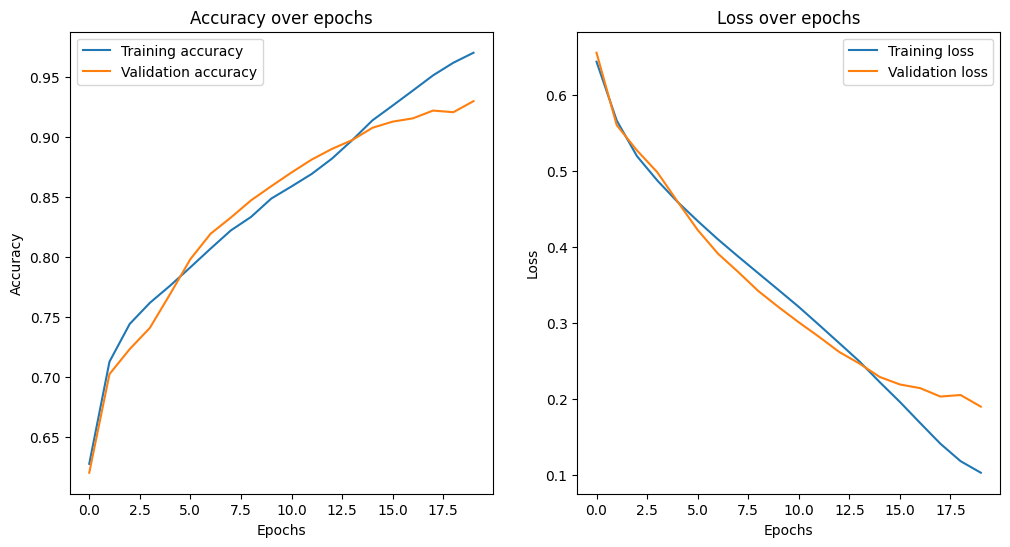

In [ ]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 6))

# Training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## **3-2) CNN initial architecture**

## Change filter size to 5

In [ ]:
# Build a simple CNN model with two convolutional layers and one fully connected layer and 5x5 filter size
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),  # Define the input shape with Input layer
    layers.Conv2D(32, (5, 5), activation='relu'),  # Changed filter size to 5x5
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (5, 5), activation='relu'),  # Changed filter size to 5x5
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # A fully connected layer
    layers.Dense(2, activation='softmax')  # Two classes (happy, sad)
])

# Compile the model using the SGD optimizer
optimizer = SGD(learning_rate=0.01)  # Set learning rate 0.01
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=20,  # Number of epochs (20 epochs)
    validation_data=val_dataset
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")


Epoch 1/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 88s 94ms/step - accuracy: 0.6095 - loss: 0.6562 - val_accuracy: 0.6434 - val_loss: 0.6333
Epoch 2/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 89s 95ms/step - accuracy: 0.7084 - loss: 0.5676 - val_accuracy: 0.6903 - val_loss: 0.5720
Epoch 3/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 88s 95ms/step - accuracy: 0.7363 - loss: 0.5213 - val_accuracy: 0.7291 - val_loss: 0.5234
Epoch 4/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 139s 92ms/step - accuracy: 0.7644 - loss: 0.4830 - val_accuracy: 0.7791 - val_loss: 0.4610
Epoch 5/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 87s 94ms/step - accuracy: 0.7821 - loss: 0.4499 - val_accuracy: 0.8049 - val_loss: 0.4241
Epoch 6/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 85s 92ms/step - accuracy: 0.7987 - loss: 0.4202 - val_accuracy: 0.8242 - val_loss: 0.3921
Epoch 7/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 144s 94ms/step - accuracy: 0.8128 - loss: 0.3934 - val_accuracy: 0.8397 - val_loss: 0.3626
Epoch 8/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 86s 93ms/step - accuracy: 0.8297 - loss: 0.3674 

## Change filter size to 7

In [ ]:
# Build a simple CNN model with two convolutional layers and one fully connected layer and 7x7 filter size
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),  # Define the input shape with Input layer
    layers.Conv2D(32, (7, 7), activation='relu'),  # Changed filter size to 7x7
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (7, 7), activation='relu'),  # Changed filter size to 7x7
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # A fully connected layer
    layers.Dense(2, activation='softmax')  # Two classes (happy, sad)
])

# Compile the model using the SGD optimizer
optimizer = SGD(learning_rate=0.01)  # Set learning rate 0.01
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=20,  # Number of epochs (20 epochs)
    validation_data=val_dataset
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

Epoch 1/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 110s 118ms/step - accuracy: 0.6178 - loss: 0.6494 - val_accuracy: 0.6543 - val_loss: 0.6392
Epoch 2/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 142s 118ms/step - accuracy: 0.7089 - loss: 0.5650 - val_accuracy: 0.7055 - val_loss: 0.5540
Epoch 3/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 109s 118ms/step - accuracy: 0.7413 - loss: 0.5121 - val_accuracy: 0.7518 - val_loss: 0.4919
Epoch 4/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 110s 118ms/step - accuracy: 0.7618 - loss: 0.4774 - val_accuracy: 0.7801 - val_loss: 0.4535
Epoch 5/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 139s 116ms/step - accuracy: 0.7772 - loss: 0.4496 - val_accuracy: 0.8044 - val_loss: 0.4218
Epoch 6/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 142s 116ms/step - accuracy: 0.7957 - loss: 0.4233 - val_accuracy: 0.8143 - val_loss: 0.3988
Epoch 7/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 108s 117ms/step - accuracy: 0.8124 - loss: 0.3994 - val_accuracy: 0.8278 - val_loss: 0.3770
Epoch 8/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 110s 118ms/step - accuracy: 0.8275 -

## Add padding

In [ ]:
# Build a simple CNN model with two convolutional layers and one fully connected layer and padding
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),  # Define the input shape with Input layer
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),  # With padding
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  # With padding
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # A fully connected layer
    layers.Dense(2, activation='softmax')  # Two classes (happy, sad)
])

# Compile the model using the SGD optimizer
optimizer = SGD(learning_rate=0.01)  # Set learning rate 0.01
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=20,  # Number of epochs (20 epochs)
    validation_data=val_dataset
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")


Epoch 1/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 71s 76ms/step - accuracy: 0.6068 - loss: 0.6619 - val_accuracy: 0.6111 - val_loss: 0.6775
Epoch 2/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 84s 78ms/step - accuracy: 0.6678 - loss: 0.6180 - val_accuracy: 0.6601 - val_loss: 0.6209
Epoch 3/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 70s 75ms/step - accuracy: 0.7147 - loss: 0.5699 - val_accuracy: 0.7019 - val_loss: 0.5604
Epoch 4/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.7382 - loss: 0.5331 - val_accuracy: 0.7260 - val_loss: 0.5308
Epoch 5/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 72s 78ms/step - accuracy: 0.7531 - loss: 0.5032 - val_accuracy: 0.7566 - val_loss: 0.4903
Epoch 6/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 80s 75ms/step - accuracy: 0.7680 - loss: 0.4761 - val_accuracy: 0.7757 - val_loss: 0.4584
Epoch 7/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.7816 - loss: 0.4517 - val_accuracy: 0.7945 - val_loss: 0.4309
Epoch 8/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 72s 78ms/step - accuracy: 0.7948 - loss: 0.4287 - 

## Change stride to 2

In [ ]:
# Build a simple CNN model with two convolutional layers and one fully connected layer and stride 2
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),  # Define the input shape with Input layer
    layers.Conv2D(32, (3, 3), activation='relu', strides=2),  # Stride set to 2
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu', strides=2),  # Stride set to 2
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # A fully connected layer
    layers.Dense(2, activation='softmax')  # Two classes (happy, sad)
])

# Compile the model using the SGD optimizer
optimizer = SGD(learning_rate=0.01)  # Set learning rate 0.01
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=20,  # Number of epochs (20 epochs)
    validation_data=val_dataset
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")


Epoch 1/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.5977 - loss: 0.6698 - val_accuracy: 0.6002 - val_loss: 0.6610
Epoch 2/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.6111 - loss: 0.6578 - val_accuracy: 0.6060 - val_loss: 0.6554
Epoch 3/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.6215 - loss: 0.6493 - val_accuracy: 0.6147 - val_loss: 0.6521
Epoch 4/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6345 - loss: 0.6399 - val_accuracy: 0.6178 - val_loss: 0.6480
Epoch 5/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.6506 - loss: 0.6298 - val_accuracy: 0.6219 - val_loss: 0.6430
Epoch 6/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6626 - loss: 0.6198 - val_accuracy: 0.6277 - val_loss: 0.6393
Epoch 7/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.6673 - loss: 0.6102 - val_accuracy: 0.6355 - val_loss: 0.6298
Epoch 8/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6743 - loss: 0.6002 - 

## Add convolutional layer

In [ ]:
# Build a simple CNN model with three convolutional layers and one fully connected layer

model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),  # Define the input shape with Input layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Increased filters to 64
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),  # Increased filters to 128
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(256, (3, 3), activation='relu'),  # Added another Conv2D layer with 256 filters
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),  # Increased dense layer size to 512
    layers.Dense(2, activation='softmax')  # Two classes (happy, sad)
])

# Compile the model using the SGD optimizer
optimizer = SGD(learning_rate=0.01)  # Set learning rate 0.01
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=20,  # Number of epochs (20 epochs)
    validation_data=val_dataset
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")


Epoch 1/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 188s 202ms/step - accuracy: 0.6018 - loss: 0.6652 - val_accuracy: 0.6036 - val_loss: 0.6531
Epoch 2/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 204s 204ms/step - accuracy: 0.6478 - loss: 0.6301 - val_accuracy: 0.6574 - val_loss: 0.6180
Epoch 3/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 197s 199ms/step - accuracy: 0.7077 - loss: 0.5703 - val_accuracy: 0.6939 - val_loss: 0.5739
Epoch 4/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 183s 197ms/step - accuracy: 0.7322 - loss: 0.5348 - val_accuracy: 0.7269 - val_loss: 0.5287
Epoch 5/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 189s 203ms/step - accuracy: 0.7517 - loss: 0.5016 - val_accuracy: 0.7547 - val_loss: 0.4848
Epoch 6/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 199s 200ms/step - accuracy: 0.7728 - loss: 0.4680 - val_accuracy: 0.7762 - val_loss: 0.4478
Epoch 7/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 188s 202ms/step - accuracy: 0.7882 - loss: 0.4376 - val_accuracy: 0.8015 - val_loss: 0.4128
Epoch 8/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 199s 199ms/step - accuracy: 0.8065 -

## Reduce convolutional layer filters

In [ ]:
# Build a simple CNN model with two convolutional layers and one fully connected layer and reduce convolutional layer filters

model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),  # Define the input shape with Input layer
    layers.Conv2D(16, (3, 3), activation='relu'),  # Decreased filters to 16
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(32, (3, 3), activation='relu'),  # Decreased filters to 32
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),  # Decreased dense layer size to 64
    layers.Dense(2, activation='softmax')  # Two classes (happy, sad)
])

# Compile the model using the SGD optimizer
optimizer = SGD(learning_rate=0.01)  # Set learning rate 0.01
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=20,  # Number of epochs (20 epochs)
    validation_data=val_dataset
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")


Epoch 1/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.6076 - loss: 0.6592 - val_accuracy: 0.6227 - val_loss: 0.6422
Epoch 2/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.6915 - loss: 0.5902 - val_accuracy: 0.6883 - val_loss: 0.5882
Epoch 3/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.7297 - loss: 0.5420 - val_accuracy: 0.7185 - val_loss: 0.5391
Epoch 4/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.7457 - loss: 0.5093 - val_accuracy: 0.7468 - val_loss: 0.5005
Epoch 5/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 36s 39ms/step - accuracy: 0.7601 - loss: 0.4821 - val_accuracy: 0.7699 - val_loss: 0.4643
Epoch 6/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 37s 34ms/step - accuracy: 0.7759 - loss: 0.4576 - val_accuracy: 0.7876 - val_loss: 0.4402
Epoch 7/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 34s 37ms/step - accuracy: 0.7895 - loss: 0.4370 - val_accuracy: 0.8039 - val_loss: 0.4119
Epoch 8/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 39s 35ms/step - accuracy: 0.8029 - loss: 0.4162 - 

## Increase MaxPooling size and add AvgPooling

In [ ]:
# Build a simple CNN model with two convolutional layers and one fully connected layer and increase MaxPooling size and add AvgPooling
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),  # Define the input shape with Input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(3, 3)),  # Increased pooling size from (2, 2) to (3, 3)

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.AveragePooling2D(pool_size=(3, 3)),  # Added AvgPooling with pool size (3, 3)

    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # A fully connected layer
    layers.Dense(2, activation='softmax')  # Two classes (happy, sad)
])

# Compile the model using the SGD optimizer
optimizer = SGD(learning_rate=0.01)  # Set learning rate 0.01
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=20,  # Number of epochs (20 epochs)
    validation_data=val_dataset
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")


Epoch 1/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 0.6020 - loss: 0.6618 - val_accuracy: 0.6081 - val_loss: 0.6483
Epoch 2/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 36s 39ms/step - accuracy: 0.6325 - loss: 0.6412 - val_accuracy: 0.6284 - val_loss: 0.6309
Epoch 3/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.6630 - loss: 0.6113 - val_accuracy: 0.6594 - val_loss: 0.5995
Epoch 4/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 36s 39ms/step - accuracy: 0.6911 - loss: 0.5816 - val_accuracy: 0.6857 - val_loss: 0.5711
Epoch 5/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - accuracy: 0.7095 - loss: 0.5631 - val_accuracy: 0.7023 - val_loss: 0.5552
Epoch 6/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.7216 - loss: 0.5496 - val_accuracy: 0.7125 - val_loss: 0.5453
Epoch 7/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.7285 - loss: 0.5387 - val_accuracy: 0.7250 - val_loss: 0.5344
Epoch 8/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 37s 40ms/step - accuracy: 0.7353 - loss: 0.5278 - 

## Using other activation functions

In [ ]:
# Build a simple CNN model with two convolutional layers and one fully connected layer and using other activation functions
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),  # Define the input shape with Input layer
    layers.Conv2D(32, (3, 3), activation='relu'),   # ReLU activation
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='sigmoid'),  # Sigmoid activation for convolutional layer
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='tanh'),  # Tanh activation for fully connected layer
    layers.Dense(2, activation='softmax')  # Softmax for output layer (multi-class classification)
])

# Compile the model using the SGD optimizer
optimizer = SGD(learning_rate=0.01)  # Set learning rate 0.01
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=20,  # Number of epochs (20 epochs)
    validation_data=val_dataset
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")


Epoch 1/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 60s 64ms/step - accuracy: 0.5746 - loss: 0.7298 - val_accuracy: 0.5956 - val_loss: 0.7191
Epoch 2/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 56s 61ms/step - accuracy: 0.5910 - loss: 0.6813 - val_accuracy: 0.5956 - val_loss: 0.7152
Epoch 3/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.5918 - loss: 0.6800 - val_accuracy: 0.5956 - val_loss: 0.7204
Epoch 4/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 62s 67ms/step - accuracy: 0.5953 - loss: 0.6780 - val_accuracy: 0.5956 - val_loss: 0.7371
Epoch 5/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.6031 - loss: 0.6733 - val_accuracy: 0.5956 - val_loss: 0.7347
Epoch 6/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 56s 60ms/step - accuracy: 0.6089 - loss: 0.6670 - val_accuracy: 0.5958 - val_loss: 0.7250
Epoch 7/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 56s 60ms/step - accuracy: 0.6122 - loss: 0.6608 - val_accuracy: 0.5958 - val_loss: 0.7225
Epoch 8/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 58s 62ms/step - accuracy: 0.6233 - loss: 0.6540 - 

## Reduce fully connted layer to 64 neurons

In [ ]:
# Build a simple CNN model with two convolutional layers and one fully connected layer and reduce fully connted layer to 64 neurons
model_small_fc = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),  # Define the input shape with Input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),  # Smaller fully connected layer (64 neurons)
    layers.Dense(2, activation='softmax')  # Two classes (happy, sad)
])

# Compile the model using the SGD optimizer
optimizer = SGD(learning_rate=0.01)  # Set learning rate 0.01
model_small_fc.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_small_fc = model_small_fc.fit(
    train_dataset,
    epochs=20,  # Number of epochs (20 epochs)
    validation_data=val_dataset
)

# Evaluate the model on the test data
test_loss_small_fc, test_acc_small_fc = model_small_fc.evaluate(test_dataset)
print(f"Test accuracy with small FC layer: {test_acc_small_fc}")


Epoch 1/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 57s 61ms/step - accuracy: 0.6076 - loss: 0.6605 - val_accuracy: 0.6123 - val_loss: 0.6741
Epoch 2/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 54s 59ms/step - accuracy: 0.6730 - loss: 0.6059 - val_accuracy: 0.6772 - val_loss: 0.5869
Epoch 3/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 58s 63ms/step - accuracy: 0.7270 - loss: 0.5472 - val_accuracy: 0.7112 - val_loss: 0.5446
Epoch 4/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 80s 60ms/step - accuracy: 0.7502 - loss: 0.5105 - val_accuracy: 0.7233 - val_loss: 0.5256
Epoch 5/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 78s 56ms/step - accuracy: 0.7688 - loss: 0.4818 - val_accuracy: 0.7467 - val_loss: 0.4897
Epoch 6/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.7806 - loss: 0.4567 - val_accuracy: 0.7702 - val_loss: 0.4564
Epoch 7/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 84s 59ms/step - accuracy: 0.7935 - loss: 0.4349 - val_accuracy: 0.7900 - val_loss: 0.4257
Epoch 8/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 79s 56ms/step - accuracy: 0.8064 - loss: 0.4147 - 

## Increase fully connted layer to 512 neurons

In [ ]:
# Build a simple CNN model with two convolutional layers and one fully connected layer and increase fully connted layer to 512 neurons
model_large_fc = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),  # Define the input shape with Input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),  # Larger fully connected layer (512 neurons)
    layers.Dense(2, activation='softmax')  # Two classes (happy, sad)
])

# Compile the model using the SGD optimizer
optimizer = SGD(learning_rate=0.01)  # Set learning rate 0.01
model_large_fc.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_large_fc = model_large_fc.fit(
    train_dataset,
    epochs=20,  # Number of epochs (20 epochs)
    validation_data=val_dataset
)

# Evaluate the model on the test data
test_loss_large_fc, test_acc_large_fc = model_large_fc.evaluate(test_dataset)
print(f"Test accuracy with large FC layer: {test_acc_large_fc}")


Epoch 1/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 76s 81ms/step - accuracy: 0.6125 - loss: 0.6551 - val_accuracy: 0.6244 - val_loss: 0.6623
Epoch 2/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 84s 84ms/step - accuracy: 0.6873 - loss: 0.5949 - val_accuracy: 0.6973 - val_loss: 0.5649
Epoch 3/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 74s 79ms/step - accuracy: 0.7327 - loss: 0.5440 - val_accuracy: 0.7284 - val_loss: 0.5252
Epoch 4/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 76s 81ms/step - accuracy: 0.7493 - loss: 0.5091 - val_accuracy: 0.7376 - val_loss: 0.5058
Epoch 5/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 78s 84ms/step - accuracy: 0.7661 - loss: 0.4800 - val_accuracy: 0.7586 - val_loss: 0.4745
Epoch 6/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 77s 79ms/step - accuracy: 0.7787 - loss: 0.4532 - val_accuracy: 0.7858 - val_loss: 0.4340
Epoch 7/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 75s 81ms/step - accuracy: 0.7941 - loss: 0.4274 - val_accuracy: 0.8052 - val_loss: 0.4041
Epoch 8/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 73s 79ms/step - accuracy: 0.8049 - loss: 0.4043 - 

# **4) Neural network training**

## **4-1) Proper optimization**

### Learning rate effects

In [ ]:
import time
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers, models

# Define the model
def create_model(learning_rate):
    model = models.Sequential([
        layers.Input(shape=(img_height, img_width, 3)),  # Define the input shape with Input layer
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),  # A fully connected layer
        layers.Dense(2, activation='softmax')  # Two classes (happy, sad)
    ])

    # Compile the model using the SGD optimizer with the given learning rate
    optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# List of learning rates to test
learning_rates = [0.1, 0.01, 0.001]

# Store the results for each learning rate
results = {}

# Train and evaluate the model for each learning rate
for lr in learning_rates:
    print(f"Training model with learning rate: {lr}")

    # Create the model with the current learning rate
    model = create_model(lr)

    # Start the timer for training
    start_time = time.time()

    # Train the model
    history = model.fit(
        train_dataset,
        epochs=20,  # Number of epochs (20 epochs)
        validation_data=val_dataset
    )

    # Stop the timer after training
    end_time = time.time()

    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(test_dataset)

    # Calculate the training time
    training_time = end_time - start_time

    # Store the results for this learning rate
    results[lr] = {
        "test_accuracy": test_acc,
        "training_time": training_time
    }

    print(f"Test accuracy with learning rate {lr}: {test_acc}")
    print(f"Training time with learning rate {lr}: {training_time:.2f} seconds\n")

# Print a summary of the results
print("Summary of results:")
for lr, result in results.items():
    print(f"Learning rate {lr} - Test Accuracy: {result['test_accuracy']:.4f}, Training Time: {result['training_time']:.2f} seconds")


Training model with learning rate: 0.1
Epoch 1/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 45s 50ms/step - accuracy: 0.6156 - loss: 0.6523 - val_accuracy: 0.7496 - val_loss: 0.4968
Epoch 2/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.7457 - loss: 0.4956 - val_accuracy: 0.8037 - val_loss: 0.4157
Epoch 3/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.7978 - loss: 0.4206 - val_accuracy: 0.8387 - val_loss: 0.3544
Epoch 4/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.8344 - loss: 0.3499 - val_accuracy: 0.8422 - val_loss: 0.3358
Epoch 5/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 50s 57ms/step - accuracy: 0.8795 - loss: 0.2727 - val_accuracy: 0.8706 - val_loss: 0.3058
Epoch 6/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 75s 50ms/step - accuracy: 0.9263 - loss: 0.1909 - val_accuracy: 0.8982 - val_loss: 0.2668
Epoch 7/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 43s 50ms/step - accuracy: 0.9448 - loss: 0.1376 - val_accuracy: 0.9017 - val_loss: 0.2763
Epoch 8/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 43s 50ms/st

### Learning rate scheduler

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler

# Define the model
def create_model(learning_rate):
    model = models.Sequential([
        layers.Input(shape=(img_height, img_width, 3)),  # Define the input shape with Input layer
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),  # A fully connected layer
        layers.Dense(2, activation='softmax')  # Two classes (happy, sad)
    ])

    # Compile the model using the SGD optimizer
    optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Define the Learning Rate Scheduler function
def scheduler(epoch, lr):
    # Decrease learning rate by half every 5 epochs
    if epoch > 0 and epoch % 5 == 0:
        lr = lr * 0.1
    return lr

# Define initial learning rate and the scheduler callback
initial_lr = 0.1
lr_scheduler = LearningRateScheduler(scheduler)

# Train the model with the Learning Rate Scheduler
model = create_model(initial_lr)

# Start training with the learning rate scheduler
history_with_scheduler = model.fit(
    train_dataset,
    epochs=20,  # Number of epochs (20 epochs)
    validation_data=val_dataset,
    callbacks=[lr_scheduler]  # Using the learning rate scheduler
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy with scheduler: {test_acc}")

Epoch 1/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 45s 51ms/step - accuracy: 0.6139 - loss: 0.6559 - val_accuracy: 0.7300 - val_loss: 0.5223 - learning_rate: 0.1000
Epoch 2/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 44s 50ms/step - accuracy: 0.7320 - loss: 0.5174 - val_accuracy: 0.7839 - val_loss: 0.4381 - learning_rate: 0.1000
Epoch 3/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 43s 50ms/step - accuracy: 0.7914 - loss: 0.4376 - val_accuracy: 0.8094 - val_loss: 0.3880 - learning_rate: 0.1000
Epoch 4/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 44s 50ms/step - accuracy: 0.8241 - loss: 0.3752 - val_accuracy: 0.8526 - val_loss: 0.3316 - learning_rate: 0.1000
Epoch 5/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 43s 50ms/step - accuracy: 0.8585 - loss: 0.3139 - val_accuracy: 0.8734 - val_loss: 0.2859 - learning_rate: 0.1000
Epoch 6/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 44s 50ms/step - accuracy: 0.8971 - loss: 0.2329 - val_accuracy: 0.9147 - val_loss: 0.2188 - learning_rate: 0.0100
Epoch 7/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.9280 - l

### Model with L2 regularization

In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
import numpy as np

# Define the model with L2 regularization
def create_model_with_L2(l2_value):
    model = models.Sequential([
        layers.Input(shape=(img_height, img_width, 3)),  # Define the input shape with Input layer
        layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2_value)),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2_value)),
        layers.MaxPooling2D(2, 2),

        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_value)),  # Fully connected layer with L2 regularization
        layers.Dense(2, activation='softmax')  # Two classes (happy, sad)
    ])

    # Compile the model using the SGD optimizer
    optimizer = SGD(learning_rate=0.01)  # Learning rate remains constant for this test
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# List to store accuracies for different L2 values
accuracies = []
l2_values = np.arange(0, 1.1, 0.1)  # L2 values from 0 to 1 with step 0.1

# Train and evaluate the model for each L2 value
for l2_value in l2_values:
    print(f"Training with L2 regularization value: {l2_value}")
    model = create_model_with_L2(l2_value)

    # Train the model for 20 epochs
    history = model.fit(
        train_dataset,
        epochs=20,  # Number of epochs
        validation_data=val_dataset,
        verbose=0  # To reduce verbosity
    )

    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
    accuracies.append(test_acc)  # Store the accuracy for this L2 value

# Find the optimal L2 value with the highest accuracy
optimal_l2_value = l2_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

# Print the results
for l2_value, acc in zip(l2_values, accuracies):
    print(f"L2 value: {l2_value}, Test accuracy: {acc:.4f}")

print(f"\nOptimal L2 value: {optimal_l2_value} with Test accuracy: {best_accuracy:.4f}")


Training with L2 regularization value: 0.0
Training with L2 regularization value: 0.1
Training with L2 regularization value: 0.2
Training with L2 regularization value: 0.30000000000000004
Training with L2 regularization value: 0.4
Training with L2 regularization value: 0.5
Training with L2 regularization value: 0.6000000000000001
Training with L2 regularization value: 0.7000000000000001
Training with L2 regularization value: 0.8
Training with L2 regularization value: 0.9
Training with L2 regularization value: 1.0
L2 value: 0.0, Test accuracy: 0.9125
L2 value: 0.1, Test accuracy: 0.6527
L2 value: 0.2, Test accuracy: 0.5953
L2 value: 0.30000000000000004, Test accuracy: 0.5953
L2 value: 0.4, Test accuracy: 0.5953
L2 value: 0.5, Test accuracy: 0.5953
L2 value: 0.6000000000000001, Test accuracy: 0.5953
L2 value: 0.7000000000000001, Test accuracy: 0.5953
L2 value: 0.8, Test accuracy: 0.5953
L2 value: 0.9, Test accuracy: 0.5953
L2 value: 1.0, Test accuracy: 0.5953

Optimal L2 value: 0.0 with 

### Change optimizer

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers
import numpy as np

# Define the model with L2 regularization
def create_model_with_L2(l2_value, optimizer):
    model = models.Sequential([
        layers.Input(shape=(img_height, img_width, 3)),  # Define the input shape with Input layer
        layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2_value)),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2_value)),
        layers.MaxPooling2D(2, 2),

        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_value)),  # Fully connected layer with L2 regularization
        layers.Dense(2, activation='softmax')  # Two classes (happy, sad)
    ])

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the Learning Rate Scheduler function
def scheduler(epoch, lr):
    # Decrease learning rate by half every 5 epochs
    if epoch > 0 and epoch % 5 == 0:
        lr = lr * 0.1
    return lr

# Define initial learning rate and the scheduler callback
initial_lr = 0.1
lr_scheduler = LearningRateScheduler(scheduler)

# L2 value found to be optimal from the previous step
optimal_l2_value = 0.0  # Use the value obtained earlier

# Compare with different optimizers (SGD and Adam)
optimizers = {
    'SGD': SGD(learning_rate=0.1),
    'Adam': Adam(learning_rate=0.1)  # Adam optimizer with learning rate 0.001
}

# Dictionary to store results for each optimizer
results = {}

for optimizer_name, optimizer in optimizers.items():
    print(f"Training with optimizer: {optimizer_name}")

    # Train the model with each optimizer and L2 value
    model = create_model_with_L2(optimal_l2_value, optimizer)

    # Train the model for 20 epochs
    history = model.fit(
        train_dataset,
        epochs=20,  # Number of epochs
        validation_data=val_dataset,
        verbose=0,  # To reduce verbosity
        callbacks=[lr_scheduler]  # Using the learning rate scheduler
    )

    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
    results[optimizer_name] = test_acc  # Store the accuracy for each optimizer

# Print the results
for optimizer_name, acc in results.items():
    print(f"Optimizer: {optimizer_name}, Test accuracy: {acc:.4f}")


Training with optimizer: SGD
Training with optimizer: Adam
Optimizer: SGD, Test accuracy: 0.9575
Optimizer: Adam, Test accuracy: 0.5953


## **4-2) Auxiliary layers**

### Add batch normalization layer

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Define the model with BatchNormalization layers
model_with_bn = models.Sequential([
    Input(shape=(img_height, img_width, 3)),  # Define the input shape with Input layer
    layers.Conv2D(32, (3, 3), activation=None),  # No activation here
    BatchNormalization(),  # Batch normalization layer
    layers.ReLU(),  # Apply ReLU activation after batch normalization
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation=None),  # No activation here
    BatchNormalization(),  # Batch normalization layer
    layers.ReLU(),  # Apply ReLU activation after batch normalization
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(2, activation='softmax')  # Two classes (happy, sad)
])

# Compile the model using the SGD optimizer
optimizer = SGD(learning_rate=0.01)  # Set learning rate 0.01
model_with_bn.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_bn = model_with_bn.fit(
    train_dataset,
    epochs=20,  # Number of epochs
    validation_data=val_dataset
)

# Evaluate the model on the test data
test_loss_bn, test_acc_bn = model_with_bn.evaluate(test_dataset)
print(f"Test accuracy with BatchNormalization: {test_acc_bn}")


Epoch 1/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 66s 75ms/step - accuracy: 0.6775 - loss: 0.6257 - val_accuracy: 0.7815 - val_loss: 0.4662
Epoch 2/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - accuracy: 0.7753 - loss: 0.4526 - val_accuracy: 0.8080 - val_loss: 0.4152
Epoch 3/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 63s 72ms/step - accuracy: 0.8167 - loss: 0.3888 - val_accuracy: 0.8314 - val_loss: 0.3767
Epoch 4/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 64s 74ms/step - accuracy: 0.8522 - loss: 0.3290 - val_accuracy: 0.8186 - val_loss: 0.3735
Epoch 5/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - accuracy: 0.8855 - loss: 0.2736 - val_accuracy: 0.7985 - val_loss: 0.4170
Epoch 6/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 62s 72ms/step - accuracy: 0.9124 - loss: 0.2181 - val_accuracy: 0.8392 - val_loss: 0.3426
Epoch 7/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 64s 74ms/step - accuracy: 0.9340 - loss: 0.1744 - val_accuracy: 0.8533 - val_loss: 0.3269
Epoch 8/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 63s 72ms/step - accuracy: 0.9540 - loss: 0.1421 - 

### Add dropout layer with rate 0.2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD

# Dropout with rate 0.2
model_with_dropout_02 = models.Sequential([
    Input(shape=(img_height, img_width, 3)),  # Define the input shape with Input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dropout(0.2),  # Dropout with rate 0.2
    layers.Dense(2, activation='softmax')  # Two classes (happy, sad)
])

# Compile the model using the SGD optimizer
optimizer = SGD(learning_rate=0.01)  # Set learning rate 0.01
model_with_dropout_02.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_dropout_02 = model_with_dropout_02.fit(
    train_dataset,
    epochs=20,  # Number of epochs
    validation_data=val_dataset
)

# Evaluate the model on the test data
test_loss_dropout_02, test_acc_dropout_02 = model_with_dropout_02.evaluate(test_dataset)
print(f"Test accuracy with Dropout rate 0.2: {test_acc_dropout_02}")


Epoch 1/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 47s 53ms/step - accuracy: 0.6008 - loss: 0.6640 - val_accuracy: 0.6637 - val_loss: 0.6369
Epoch 2/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 44s 51ms/step - accuracy: 0.6546 - loss: 0.6202 - val_accuracy: 0.7265 - val_loss: 0.5716
Epoch 3/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.7137 - loss: 0.5624 - val_accuracy: 0.7522 - val_loss: 0.5295
Epoch 4/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 44s 51ms/step - accuracy: 0.7312 - loss: 0.5247 - val_accuracy: 0.7648 - val_loss: 0.4971
Epoch 5/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 44s 51ms/step - accuracy: 0.7546 - loss: 0.4947 - val_accuracy: 0.7752 - val_loss: 0.4700
Epoch 6/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 46s 53ms/step - accuracy: 0.7687 - loss: 0.4671 - val_accuracy: 0.7917 - val_loss: 0.4445
Epoch 7/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.7817 - loss: 0.4443 - val_accuracy: 0.8056 - val_loss: 0.4254
Epoch 8/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 44s 51ms/step - accuracy: 0.7943 - loss: 0.4223 - 

### Add dropout layer with rate 0.5

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, ReLU
from tensorflow.keras.optimizers import SGD

# Dropout with rate 0.5
model_with_dropout_05 = models.Sequential([
    Input(shape=(img_height, img_width, 3)),  # Define the input shape with Input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Dropout with rate 0.5
    layers.Dense(2, activation='softmax')  # Two classes (happy, sad)
])

# Compile the model using the SGD optimizer
optimizer = SGD(learning_rate=0.01)  # Set learning rate 0.01
model_with_dropout_05.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_dropout_05 = model_with_dropout_05.fit(
    train_dataset,
    epochs=20,  # Number of epochs
    validation_data=val_dataset
)

# Evaluate the model on the test data
test_loss_dropout_05, test_acc_dropout_05 = model_with_dropout_05.evaluate(test_dataset)
print(f"Test accuracy with Dropout rate 0.5: {test_acc_dropout_05}")

Epoch 1/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 45s 51ms/step - accuracy: 0.6012 - loss: 0.6688 - val_accuracy: 0.6590 - val_loss: 0.6521
Epoch 2/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 45s 51ms/step - accuracy: 0.6398 - loss: 0.6390 - val_accuracy: 0.7111 - val_loss: 0.5937
Epoch 3/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 84s 53ms/step - accuracy: 0.6969 - loss: 0.5893 - val_accuracy: 0.7388 - val_loss: 0.5465
Epoch 4/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.7156 - loss: 0.5493 - val_accuracy: 0.7598 - val_loss: 0.5169
Epoch 5/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.7394 - loss: 0.5238 - val_accuracy: 0.7619 - val_loss: 0.4981
Epoch 6/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 44s 51ms/step - accuracy: 0.7504 - loss: 0.4985 - val_accuracy: 0.7773 - val_loss: 0.4767
Epoch 7/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 46s 53ms/step - accuracy: 0.7587 - loss: 0.4810 - val_accuracy: 0.7827 - val_loss: 0.4616
Epoch 8/20
868/868 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.7776 - loss: 0.4634 - 

### Add dropout and batch normalization layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

# Define the model with both BatchNormalization and Dropout
model_with_bn_and_dropout_02 = models.Sequential([
    Input(shape=(img_height, img_width, 3)),  # Define the input shape with Input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),  # Apply Batch Normalization
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),  # Apply Batch Normalization
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dropout(0.2),  # Dropout with rate 0.2
    layers.Dense(2, activation='softmax')  # Two classes (happy, sad)
])

# Compile the model using the SGD optimizer
optimizer = SGD(learning_rate=0.01)  # Set learning rate 0.01
model_with_bn_and_dropout_02.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_bn_and_dropout_02 = model_with_bn_and_dropout_02.fit(
    train_dataset,
    epochs=20,  # Number of epochs
    validation_data=val_dataset
)

# Evaluate the model on the test data
test_loss_bn_and_dropout_02, test_acc_bn_and_dropout_02 = model_with_bn_and_dropout_02.evaluate(test_dataset)
print(f"Test accuracy with BatchNorm and Dropout rate 0.2: {test_acc_bn_and_dropout_02}")

Epoch 1/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 58s 84ms/step - accuracy: 0.6658 - loss: 0.7374 - val_accuracy: 0.6280 - val_loss: 0.6501
Epoch 2/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 57s 86ms/step - accuracy: 0.7781 - loss: 0.4631 - val_accuracy: 0.6858 - val_loss: 0.6045
Epoch 3/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.8215 - loss: 0.3857 - val_accuracy: 0.5991 - val_loss: 0.7815
Epoch 4/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 54s 81ms/step - accuracy: 0.8559 - loss: 0.3194 - val_accuracy: 0.7405 - val_loss: 0.5229
Epoch 5/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.8930 - loss: 0.2536 - val_accuracy: 0.7702 - val_loss: 0.4840
Epoch 6/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 55s 83ms/step - accuracy: 0.9181 - loss: 0.2024 - val_accuracy: 0.7943 - val_loss: 0.4724
Epoch 7/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 55s 83ms/step - accuracy: 0.9342 - loss: 0.1680 - val_accuracy: 0.7807 - val_loss: 0.5413
Epoch 8/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.9488 - loss: 0.1337 - 

## **4-3) Appropriate training stop**

### Add epochs to 50.

Epoch 1/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 39s 58ms/step - accuracy: 0.6011 - loss: 0.6622 - val_accuracy: 0.6788 - val_loss: 0.6312
Epoch 2/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.6586 - loss: 0.6179 - val_accuracy: 0.7252 - val_loss: 0.5729
Epoch 3/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 39s 58ms/step - accuracy: 0.7069 - loss: 0.5705 - val_accuracy: 0.7567 - val_loss: 0.5251
Epoch 4/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 37s 56ms/step - accuracy: 0.7319 - loss: 0.5380 - val_accuracy: 0.7676 - val_loss: 0.4955
Epoch 5/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.7461 - loss: 0.5105 - val_accuracy: 0.7733 - val_loss: 0.4715
Epoch 6/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - accuracy: 0.7645 - loss: 0.4837 - val_accuracy: 0.7816 - val_loss: 0.4530
Epoch 7/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 79s 58ms/step - accuracy: 0.7791 - loss: 0.4600 - val_accuracy: 0.7851 - val_loss: 0.4389
Epoch 8/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.7878 - loss: 0.4397 - 

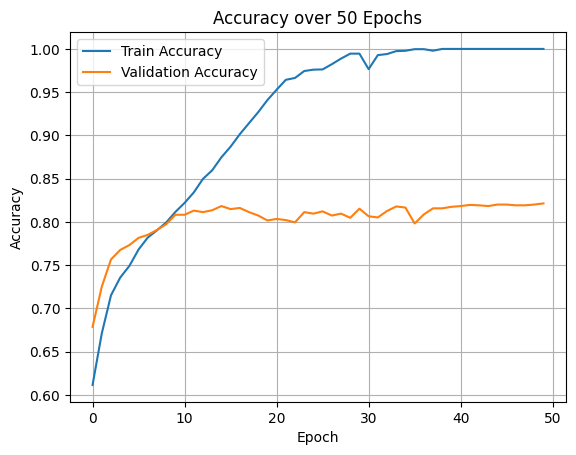

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Define the CNN model
model = models.Sequential([
    Input(shape=(img_height, img_width, 3)),  # Input shape
    layers.Conv2D(32, (3, 3), activation='relu'),  # First convolutional layer
    layers.MaxPooling2D(2, 2),  # First max pooling layer

    layers.Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
    layers.MaxPooling2D(2, 2),  # Second max pooling layer

    layers.Flatten(),  # Flatten the feature maps
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(2, activation='softmax')  # Output layer for 2 classes: happy and sad
])

# Compile the model
optimizer = SGD(learning_rate=0.01)  # Stochastic Gradient Descent optimizer with learning rate 0.01
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 50 epochs
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset
)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over 50 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### Add early stopping.

Epoch 1/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.6017 - loss: 0.6630 - val_accuracy: 0.6521 - val_loss: 0.6370
Epoch 2/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 37s 54ms/step - accuracy: 0.6448 - loss: 0.6272 - val_accuracy: 0.7182 - val_loss: 0.5831
Epoch 3/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.6953 - loss: 0.5800 - val_accuracy: 0.7505 - val_loss: 0.5334
Epoch 4/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 38s 57ms/step - accuracy: 0.7264 - loss: 0.5479 - val_accuracy: 0.7615 - val_loss: 0.5094
Epoch 5/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 37s 55ms/step - accuracy: 0.7390 - loss: 0.5244 - val_accuracy: 0.7685 - val_loss: 0.4911
Epoch 6/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - accuracy: 0.7503 - loss: 0.5010 - val_accuracy: 0.7724 - val_loss: 0.4724
Epoch 7/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 39s 59ms/step - accuracy: 0.7664 - loss: 0.4778 - val_accuracy: 0.7807 - val_loss: 0.4559
Epoch 8/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.7796 - loss: 0.4553 - 

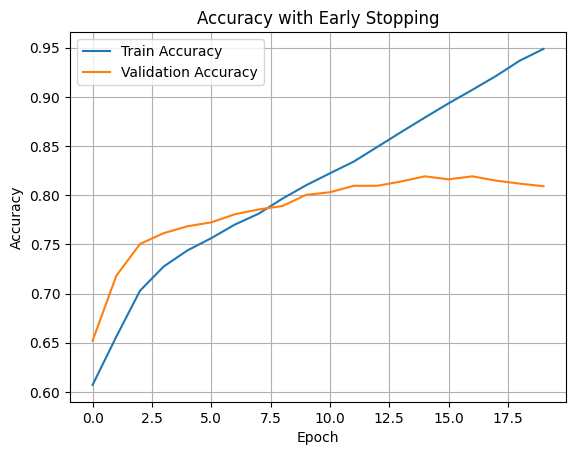

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define the CNN model
model = models.Sequential([
    Input(shape=(img_height, img_width, 3)),  # Input shape
    layers.Conv2D(32, (3, 3), activation='relu'),  # First convolutional layer
    layers.MaxPooling2D(2, 2),  # First max pooling layer

    layers.Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
    layers.MaxPooling2D(2, 2),  # Second max pooling layer

    layers.Flatten(),  # Flatten the feature maps
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(2, activation='softmax')  # Output layer for 2 classes: happy and sad
])

# Compile the model
optimizer = SGD(learning_rate=0.01)  # SGD optimizer
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model for up to 50 epochs with EarlyStopping
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset,
    callbacks=[early_stop]
)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy with Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### Add new approach.

Epoch 1/50
665/666 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6011 - loss: 0.6643
Epoch 1: val_accuracy improved from -inf to 0.63589, saving model to best_model.h5


666/666 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.6011 - loss: 0.6643 - val_accuracy: 0.6359 - val_loss: 0.6418
Epoch 2/50
665/666 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6419 - loss: 0.6310
Epoch 2: val_accuracy improved from 0.63589 to 0.70810, saving model to best_model.h5


666/666 ━━━━━━━━━━━━━━━━━━━━ 39s 59ms/step - accuracy: 0.6419 - loss: 0.6310 - val_accuracy: 0.7081 - val_loss: 0.5976
Epoch 3/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6893 - loss: 0.5873
Epoch 3: val_accuracy improved from 0.70810 to 0.74398, saving model to best_model.h5


666/666 ━━━━━━━━━━━━━━━━━━━━ 37s 56ms/step - accuracy: 0.6894 - loss: 0.5873 - val_accuracy: 0.7440 - val_loss: 0.5452
Epoch 4/50
665/666 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7182 - loss: 0.5529
Epoch 4: val_accuracy improved from 0.74398 to 0.75799, saving model to best_model.h5


666/666 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.7183 - loss: 0.5529 - val_accuracy: 0.7580 - val_loss: 0.5150
Epoch 5/50
665/666 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7321 - loss: 0.5279
Epoch 5: val_accuracy improved from 0.75799 to 0.76543, saving model to best_model.h5


666/666 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.7321 - loss: 0.5279 - val_accuracy: 0.7654 - val_loss: 0.4931
Epoch 6/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7479 - loss: 0.5041
Epoch 6: val_accuracy improved from 0.76543 to 0.76761, saving model to best_model.h5


666/666 ━━━━━━━━━━━━━━━━━━━━ 38s 57ms/step - accuracy: 0.7479 - loss: 0.5041 - val_accuracy: 0.7676 - val_loss: 0.4772
Epoch 7/50
665/666 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7622 - loss: 0.4817
Epoch 7: val_accuracy improved from 0.76761 to 0.77681, saving model to best_model.h5


666/666 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.7622 - loss: 0.4817 - val_accuracy: 0.7768 - val_loss: 0.4624
Epoch 8/50
665/666 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7706 - loss: 0.4612
Epoch 8: val_accuracy improved from 0.77681 to 0.78249, saving model to best_model.h5


666/666 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.7706 - loss: 0.4612 - val_accuracy: 0.7825 - val_loss: 0.4469
Epoch 9/50
665/666 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7845 - loss: 0.4410
Epoch 9: val_accuracy improved from 0.78249 to 0.79344, saving model to best_model.h5


666/666 ━━━━━━━━━━━━━━━━━━━━ 38s 58ms/step - accuracy: 0.7845 - loss: 0.4410 - val_accuracy: 0.7934 - val_loss: 0.4369
Epoch 10/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7942 - loss: 0.4221
Epoch 10: val_accuracy improved from 0.79344 to 0.79387, saving model to best_model.h5


666/666 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.7942 - loss: 0.4221 - val_accuracy: 0.7939 - val_loss: 0.4302
Epoch 11/50
665/666 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8049 - loss: 0.4025
Epoch 11: val_accuracy improved from 0.79387 to 0.80131, saving model to best_model.h5


666/666 ━━━━━━━━━━━━━━━━━━━━ 39s 58ms/step - accuracy: 0.8049 - loss: 0.4025 - val_accuracy: 0.8013 - val_loss: 0.4226
Epoch 12/50
665/666 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8207 - loss: 0.3820
Epoch 12: val_accuracy improved from 0.80131 to 0.80438, saving model to best_model.h5


666/666 ━━━━━━━━━━━━━━━━━━━━ 37s 56ms/step - accuracy: 0.8208 - loss: 0.3820 - val_accuracy: 0.8044 - val_loss: 0.4199
Epoch 13/50
665/666 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8345 - loss: 0.3607
Epoch 13: val_accuracy improved from 0.80438 to 0.80832, saving model to best_model.h5


666/666 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.8345 - loss: 0.3607 - val_accuracy: 0.8083 - val_loss: 0.4120
Epoch 14/50
665/666 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8457 - loss: 0.3369
Epoch 14: val_accuracy improved from 0.80832 to 0.81225, saving model to best_model.h5


666/666 ━━━━━━━━━━━━━━━━━━━━ 39s 58ms/step - accuracy: 0.8457 - loss: 0.3369 - val_accuracy: 0.8123 - val_loss: 0.4143
Epoch 15/50
665/666 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8635 - loss: 0.3129
Epoch 15: val_accuracy did not improve from 0.81225
666/666 ━━━━━━━━━━━━━━━━━━━━ 39s 58ms/step - accuracy: 0.8635 - loss: 0.3128 - val_accuracy: 0.8114 - val_loss: 0.4150
Epoch 16/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8763 - loss: 0.2903
Epoch 16: val_accuracy did not improve from 0.81225
666/666 ━━━━━━━━━━━━━━━━━━━━ 37s 56ms/step - accuracy: 0.8763 - loss: 0.2903 - val_accuracy: 0.8092 - val_loss: 0.4248
Epoch 17/50
665/666 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8909 - loss: 0.2672
Epoch 17: val_accuracy did not improve from 0.81225
666/666 ━━━━━━━━━━━━━━━━━━━━ 43s 58ms/step - accuracy: 0.8909 - loss: 0.2672 - val_accuracy: 0.8070 - val_loss: 0.4412
Epoch 18/50
665/666 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9063 - loss: 0.2406
Epoch 18: val_ac

666/666 ━━━━━━━━━━━━━━━━━━━━ 39s 59ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.8131 - val_loss: 1.0219
Epoch 45/50
665/666 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.0020
Epoch 45: val_accuracy did not improve from 0.81313
666/666 ━━━━━━━━━━━━━━━━━━━━ 37s 55ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.8118 - val_loss: 1.0329
Epoch 46/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 1.0000 - loss: 0.0019
Epoch 46: val_accuracy did not improve from 0.81313
666/666 ━━━━━━━━━━━━━━━━━━━━ 39s 59ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.8131 - val_loss: 1.0436
Epoch 47/50
665/666 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.0017
Epoch 47: val_accuracy did not improve from 0.81313
666/666 ━━━━━━━━━━━━━━━━━━━━ 37s 56ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.8131 - val_loss: 1.0546
Epoch 48/50
665/666 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.0016
Epoch 48: val_ac

666/666 ━━━━━━━━━━━━━━━━━━━━ 39s 58ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.8140 - val_loss: 1.0651
Epoch 49/50
665/666 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.0015
Epoch 49: val_accuracy improved from 0.81400 to 0.81444, saving model to best_model.h5


666/666 ━━━━━━━━━━━━━━━━━━━━ 43s 61ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.8144 - val_loss: 1.0754
Epoch 50/50
665/666 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.0014
Epoch 50: val_accuracy improved from 0.81444 to 0.81488, saving model to best_model.h5


666/666 ━━━━━━━━━━━━━━━━━━━━ 42s 63ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.8149 - val_loss: 1.0852
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8114 - loss: 1.1054
Best model test accuracy: 0.8112133145332336


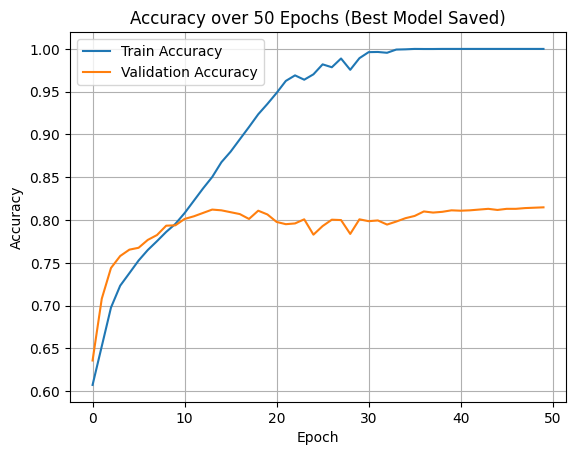

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, models, Input

# Define the CNN model
model = models.Sequential([
    Input(shape=(img_height, img_width, 3)),  # Input shape
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

# Compile the model
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define ModelCheckpoint callback to save the best model based on validation accuracy
checkpoint = ModelCheckpoint(
    filepath='best_model.h5',  # Path to save the model
    monitor='val_accuracy',    # Monitor validation accuracy
    save_best_only=True,       # Save only the best model
    mode='max',                # Because higher accuracy is better
    verbose=1
)

# Train the model for more epochs (e.g. 50) while keeping the best one
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset,
    callbacks=[checkpoint]
)

# Load the best saved model (optional, but recommended)
model.load_weights('best_model.h5')

# Evaluate the best model on the test data
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Best model test accuracy: {test_acc}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over 50 Epochs (Best Model Saved)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


## **4-4) Model setting**

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from tensorflow.keras import layers, models, regularizers, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

def build_model(hp):
    model = models.Sequential([
        Input(shape=(img_height, img_width, 3)),

        layers.Conv2D(
            32, (3, 3), activation='relu',
            kernel_regularizer=regularizers.l2(hp.Float('l2', 1e-5, 1e-2, sampling='log'))
        ),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(
            64, (3, 3), activation='relu',
            kernel_regularizer=regularizers.l2(hp.Float('l2', 1e-5, 1e-2, sampling='log'))
        ),
        layers.MaxPooling2D(2, 2),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(2, activation='softmax')
    ])

    optimizer = SGD(
        learning_rate=hp.Float('lr', 1e-4, 1e-1, sampling='log')
    )

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Define early stopping callback
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    mode='max',
    restore_best_weights=True
)

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_tuning_dir',
    project_name='my_cnn_tuning'
)

# Perform hyperparameter search
tuner.search(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    callbacks=[early_stop]
)

# Get best hyperparameters
best_hps = tuner.get_best_hyperparameters(1)[0]

print(f"Best learning rate: {best_hps.get('lr')}")
print(f"Best L2 regularization: {best_hps.get('l2')}")

# Build and train final model
model = tuner.hypermodel.build(best_hps)
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    callbacks=[early_stop]
)

# Evaluate
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.4f}")

Trial 10 Complete [00h 05m 55s]
val_accuracy: 0.6579062342643738

Best val_accuracy So Far: 0.8085851669311523
Total elapsed time: 00h 55m 33s
Best learning rate: 0.09141157447134537
Best L2 regularization: 0.0001692926228562074
Epoch 1/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 35s 51ms/step - accuracy: 0.6136 - loss: 0.6600 - val_accuracy: 0.7324 - val_loss: 0.5420
Epoch 2/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 32s 49ms/step - accuracy: 0.7327 - loss: 0.5215 - val_accuracy: 0.7578 - val_loss: 0.4776
Epoch 3/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 32s 49ms/step - accuracy: 0.7893 - loss: 0.4450 - val_accuracy: 0.7836 - val_loss: 0.4446
Epoch 4/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 34s 51ms/step - accuracy: 0.8252 - loss: 0.3819 - val_accuracy: 0.8003 - val_loss: 0.4367
Epoch 5/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 32s 49ms/step - accuracy: 0.8639 - loss: 0.3164 - val_accuracy: 0.7950 - val_loss: 0.4884
Epoch 6/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 32s 48ms/step - accuracy: 0.9026 - loss: 0.2491 - val_accuracy: 0.7937 - val_loss

## **4-6) Transfer learning**

<ipython-input-15-f280a85a6228>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.6343 - loss: 0.6613 - val_accuracy: 0.6417 - val_loss: 0.6399
Epoch 2/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.7094 - loss: 0.5628 - val_accuracy: 0.6570 - val_loss: 0.6284
Epoch 3/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.7376 - loss: 0.5287 - val_accuracy: 0.6662 - val_loss: 0.6236
Epoch 4/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 29s 44ms/step - accuracy: 0.7581 - loss: 0.4975 - val_accuracy: 0.6710 - val_loss: 0.6246
Epoch 5/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.7823 - loss: 0.4677 - val_accuracy: 0.6772 - val_loss: 0.6259
Epoch 6/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.8058 - loss: 0.4367 - val_accuracy: 0.6785 - val_loss: 0.6336
Epoch 7/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 30s 44ms/step - accuracy: 0.8243 - loss: 0.4048 - val_accuracy: 0.6837 - val_loss: 0.6448
Epoch 8/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 4

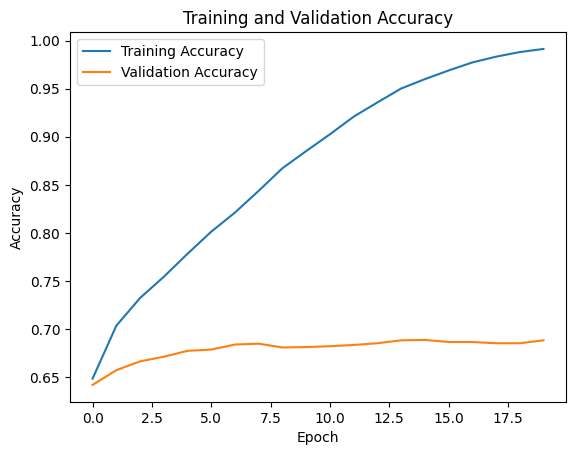

In [ ]:
from tensorflow.keras import Input, layers, models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import MobileNetV2

# Load MobileNetV2 model as a feature extractor
base_model = MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')

# Freeze all layers in the base model
base_model.trainable = False

# Build a new model on top of MobileNetV2
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # Two classes (happy, sad)
])

# Compile the model using the SGD optimizer
optimizer = SGD(learning_rate=0.01)  # Set learning rate 0.01
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=20,  # Number of epochs (20 epochs)
    validation_data=val_dataset
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## **4-7) The impact of datasets on education**

In [ ]:
from tensorflow.keras import Input, layers, models
from tensorflow.keras.optimizers import SGD
from sklearn.utils import class_weight  # Import class_weight for handling imbalanced data

# Calculate class weights to handle imbalanced dataset
# Get the labels from the training dataset to calculate class weights
# These labels are used to compute the weight for each class to balance the model's focus
train_labels = np.concatenate([label.numpy() for _, label in train_dataset], axis=0)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)

# Create a dictionary of class weights
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Build a simple CNN model with two convolutional layers and one fully connected layer
model = models.Sequential([
    Input(shape=(img_height, img_width, 3)),  # Define the input shape with Input layer
    layers.Conv2D(32, (3, 3), activation='relu'),  # First convolutional layer with ReLU activation
    layers.MaxPooling2D(2, 2),  # Max pooling layer

    layers.Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
    layers.MaxPooling2D(2, 2),  # Max pooling layer

    layers.Flatten(),  # Flatten the 2D outputs to 1D for the fully connected layer
    layers.Dense(128, activation='relu'),  # A fully connected layer with ReLU activation
    layers.Dense(2, activation='softmax')  # Output layer with softmax for 2 classes (happy, sad)
])

# Compile the model using the SGD optimizer
optimizer = SGD(learning_rate=0.01)  # Set learning rate 0.01
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with class weights to handle class imbalance
history = model.fit(
    train_dataset,
    epochs=20,  # Number of epochs (20 epochs)
    validation_data=val_dataset,
    class_weight=class_weight_dict  # Add class weights to the training process
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

Epoch 1/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 36s 52ms/step - accuracy: 0.5765 - loss: 0.6843 - val_accuracy: 0.6702 - val_loss: 0.6221
Epoch 2/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 33s 49ms/step - accuracy: 0.6522 - loss: 0.6262 - val_accuracy: 0.7109 - val_loss: 0.5745
Epoch 3/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.7125 - loss: 0.5644 - val_accuracy: 0.7254 - val_loss: 0.5533
Epoch 4/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.7422 - loss: 0.5306 - val_accuracy: 0.7398 - val_loss: 0.5368
Epoch 5/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.7560 - loss: 0.5050 - val_accuracy: 0.7416 - val_loss: 0.5207
Epoch 6/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.7657 - loss: 0.4820 - val_accuracy: 0.7543 - val_loss: 0.5047
Epoch 7/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.7777 - loss: 0.4602 - val_accuracy: 0.7547 - val_loss: 0.4925
Epoch 8/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.7859 - loss: 0.4402 - 

# **5) Load other datasets**

## Affectnet dataset

In [ ]:
!kaggle datasets download -d mstjebashazida/affectnet
!unzip affectnet.zip -d affectnet
!rm affectnet.zip -f
!ls

Streaming output truncated to the last 5000 lines.
  inflating: affectnet/archive (3)/Train/sad/image0004250.jpg  
  inflating: affectnet/archive (3)/Train/sad/image0004289.jpg  
  inflating: affectnet/archive (3)/Train/sad/image0004290.jpg  
  inflating: affectnet/archive (3)/Train/sad/image0004297.jpg  
  inflating: affectnet/archive (3)/Train/sad/image0004426.jpg  
  inflating: affectnet/archive (3)/Train/sad/image0004454.jpg  
  inflating: affectnet/archive (3)/Train/sad/image0004490.jpg  
  inflating: affectnet/archive (3)/Train/sad/image0004498.jpg  
  inflating: affectnet/archive (3)/Train/sad/image0004510.jpg  
  inflating: affectnet/archive (3)/Train/sad/image0004533.jpg  
  inflating: affectnet/archive (3)/Train/sad/image0004549.jpg  
  inflating: affectnet/archive (3)/Train/sad/image0004551.jpg  
  inflating: affectnet/archive (3)/Train/sad/image0004566.jpg  
  inflating: affectnet/archive (3)/Train/sad/image0004570.jpg  
  inflating: affectnet/archive (3)/Train/sad/image000

In [ ]:
!mv "affectnet/archive (3)/" "/content/affectnet/p/"
!mkdir happy sad

!cp /content/affectnet/p/Test/happy/* happy
!cp /content/affectnet/p/Test/sad/* sad
!cp /content/affectnet/p/Train/happy/* happy
!cp /content/affectnet/p/Train/sad/* sad

!rm -r affectnet -f
!ls

dataset  drive	happy  my_tuning_dir  sad  sample_data


In [ ]:
resize_images_to_common_size(happy_folder, common_size)
resize_images_to_common_size(sad_folder, common_size)
rename_images(happy_folder, 'happy')
rename_images(sad_folder, 'sad')

# Merging folders
# Source folders (happy and sad) and destination folder (dataset)
dataset2_folder = "affectnet"  # Destination folder for merging
merge_folders([happy_folder, sad_folder], dataset2_folder)

# Remove the original folders "happy" and "sad"
!rm -r happy sad

# List the files in the current directory
! ls

Streaming output truncated to the last 5000 lines.
Copied happy0003682.png to affectnet
Copied happy0000235.png to affectnet
Copied happy0000563.png to affectnet
Copied happy0001565.png to affectnet
Copied happy0002203.png to affectnet
Copied happy0003040.png to affectnet
Copied happy0004559.png to affectnet
Copied happy0004234.png to affectnet
Copied happy0001590.png to affectnet
Copied happy0000898.png to affectnet
Copied happy0001053.png to affectnet
Copied happy0002357.png to affectnet
Copied happy0001223.png to affectnet
Copied happy0002882.png to affectnet
Copied happy0004751.png to affectnet
Copied happy0003542.png to affectnet
Copied happy0001743.png to affectnet
Copied happy0000921.png to affectnet
Copied happy0003111.png to affectnet
Copied happy0001637.png to affectnet
Copied happy0003774.png to affectnet
Copied happy0002569.png to affectnet
Copied happy0001054.png to affectnet
Copied happy0000745.png to affectnet
Copied happy0004047.png to affectnet
Copied happy0001260.png 

In [ ]:
# Build a simple CNN model with two convolutional layers and one fully connected layer and 3x3 filter size and without padding and stride 1
model = models.Sequential([
    Input(shape=(img_height, img_width, 3)),  # Define the input shape with Input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # A fully connected layer
    layers.Dense(2, activation='softmax')  # Two classes (happy, sad)
])

# Compile the model using the SGD optimizer
optimizer = SGD(learning_rate=0.01)  # Set learning rate 0.01
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=20,  # Number of epochs (20 epochs)
    validation_data=val_dataset
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

Epoch 1/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - accuracy: 0.5991 - loss: 0.6647 - val_accuracy: 0.6229 - val_loss: 0.6379
Epoch 2/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.6514 - loss: 0.6261 - val_accuracy: 0.6811 - val_loss: 0.5908
Epoch 3/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.6931 - loss: 0.5789 - val_accuracy: 0.7162 - val_loss: 0.5591
Epoch 4/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.7264 - loss: 0.5410 - val_accuracy: 0.7249 - val_loss: 0.5377
Epoch 5/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.7459 - loss: 0.5150 - val_accuracy: 0.7389 - val_loss: 0.5187
Epoch 6/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.7626 - loss: 0.4903 - val_accuracy: 0.7512 - val_loss: 0.4982
Epoch 7/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.7694 - loss: 0.4666 - val_accuracy: 0.7622 - val_loss: 0.4819
Epoch 8/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.7829 - loss: 0.4457 - 

In [ ]:
# Define the path to the new dataset for testing
new_test_dir = "affectnet"  # Update this if your dataset2 has a different structure

# Load the new test data
new_test_dataset = generate_data_from_directory(new_test_dir, batch_size, img_height, img_width)

# Evaluate the trained model on the new test data
new_test_loss, new_test_acc = model.evaluate(new_test_dataset)
print(f"Accuracy on affectnet: {new_test_acc}")

196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6675 - loss: 0.9283
Accuracy on affectnet: 0.6549744606018066


## jaffe dataset

In [ ]:
!cp /content/drive/MyDrive/Data_extraction_and_analysis/HW1/jaffe.zip .
!unzip jaffe.zip -d jaffe
!rm jaffe.zip -f

Archive:  jaffe.zip
   creating: jaffe/jaffe/
  inflating: jaffe/jaffe/MK.AN3.127.tiff  
  inflating: jaffe/jaffe/MK.NE1.113.tiff  
  inflating: jaffe/jaffe/YM.AN3.63.tiff  
  inflating: jaffe/jaffe/MK.SA1.119.tiff  
  inflating: jaffe/jaffe/KA.AN1.39.tiff  
  inflating: jaffe/jaffe/KA.SU2.37.tiff  
  inflating: jaffe/jaffe/YM.NE2.50.tiff  
  inflating: jaffe/jaffe/TM.HA2.181.tiff  
  inflating: jaffe/jaffe/NA.FE2.218.tiff  
  inflating: jaffe/jaffe/YM.NE3.51.tiff  
  inflating: jaffe/jaffe/MK.DI1.128.tiff  
  inflating: jaffe/jaffe/YM.AN2.62.tiff  
  inflating: jaffe/jaffe/KL.AN2.168.tiff  
  inflating: jaffe/jaffe/YM.HA2.53.tiff  
  inflating: jaffe/jaffe/NA.AN2.212.tiff  
  inflating: jaffe/jaffe/KM.SA5.13.tiff  
  inflating: jaffe/jaffe/UY.FE1.152.tiff  
  inflating: jaffe/jaffe/UY.AN2.147.tiff  
  inflating: jaffe/jaffe/KR.NE1.71.tiff  
  inflating: jaffe/jaffe/NA.HA3.204.tiff  
  inflating: jaffe/jaffe/KM.HA2.5.tiff  
  inflating: jaffe/jaffe/KA.FE1.45.tiff  
  inflating: jaffe/j

In [ ]:
import os
import shutil
from PIL import Image  # For image conversion

# Paths configuration
SOURCE_FOLDER = "jaffe/jaffe/"  # Folder containing original JAFFE TIFF images
TARGET_FOLDER = "."  # Output folder for organized JPGs

# Create target directories if they don't exist
os.makedirs(os.path.join(TARGET_FOLDER, "happy"), exist_ok=True)
os.makedirs(os.path.join(TARGET_FOLDER, "sad"), exist_ok=True)

def convert_tiff_to_jpg(tiff_path, jpg_path):
    """Convert TIFF image to JPG format"""
    try:
        img = Image.open(tiff_path)
        img.convert('RGB').save(jpg_path, 'JPEG', quality=90)
        return True
    except Exception as e:
        print(f"Error converting {tiff_path}: {str(e)}")
        return False

# Process each file in the source directory
for filename in os.listdir(SOURCE_FOLDER):
    if filename.lower().endswith('.tiff'):
        # Extract emotion code from filename (e.g., 'HA' from 'KA.HA1.39.tiff')
        emotion_code = filename.split('.')[1][:2]

        # Set target subfolder based on emotion
        target_subfolder = None

        if emotion_code == "HA":  # Happy
            target_subfolder = "happy"
        elif emotion_code == "SA":  # Sad
            target_subfolder = "sad"

        if target_subfolder:
            # Define paths
            src_path = os.path.join(SOURCE_FOLDER, filename)
            dest_path = os.path.join(
                TARGET_FOLDER,
                target_subfolder,
                filename.replace('.tiff', '.jpg')
            )

            # Convert and save image
            if convert_tiff_to_jpg(src_path, dest_path):
                print(f"Converted {filename} to JPG in {target_subfolder}/")
            else:
                print(f"Failed to process {filename}")

Converted UY.SA1.140.tiff to JPG in sad/
Converted UY.SA2.141.tiff to JPG in sad/
Converted KL.SA1.161.tiff to JPG in sad/
Converted KM.HA3.6.tiff to JPG in happy/
Converted YM.HA1.52.tiff to JPG in happy/
Converted YM.HA3.54.tiff to JPG in happy/
Converted KM.HA2.5.tiff to JPG in happy/
Converted MK.HA2.117.tiff to JPG in happy/
Converted UY.HA3.139.tiff to JPG in happy/
Converted KA.SA1.33.tiff to JPG in sad/
Converted TM.HA1.180.tiff to JPG in happy/
Converted YM.HA2.53.tiff to JPG in happy/
Converted UY.SA3.142.tiff to JPG in sad/
Converted NA.SA3.207.tiff to JPG in sad/
Converted KM.HA4.7.tiff to JPG in happy/
Converted NA.SA2.206.tiff to JPG in sad/
Converted KL.SA2.162.tiff to JPG in sad/
Converted KR.HA2.75.tiff to JPG in happy/
Converted NA.HA3.204.tiff to JPG in happy/
Converted KA.HA3.31.tiff to JPG in happy/
Converted KL.HA1.158.tiff to JPG in happy/
Converted TM.HA3.182.tiff to JPG in happy/
Converted NA.HA1.202.tiff to JPG in happy/
Converted KL.SA3.163.tiff to JPG in sad

In [ ]:
!rm -r jaffe
resize_images_to_common_size(happy_folder, common_size)
resize_images_to_common_size(sad_folder, common_size)
rename_images(happy_folder, 'happy')
rename_images(sad_folder, 'sad')

# Merging folders
# Source folders (happy and sad) and destination folder (dataset)
dataset2_folder = "jaffe"  # Destination folder for merging
merge_folders([happy_folder, sad_folder], dataset2_folder)

# Remove the original folders "happy" and "sad"
!rm -r happy sad

# List the files in the current directory
! ls

KL.HA3.160.jpg resized to (48, 48).
NA.HA2.203.jpg resized to (48, 48).
KM.HA3.6.jpg resized to (48, 48).
NM.HA3.97.jpg resized to (48, 48).
MK.HA2.117.jpg resized to (48, 48).
KA.HA3.31.jpg resized to (48, 48).
YM.HA1.52.jpg resized to (48, 48).
MK.HA1.116.jpg resized to (48, 48).
KL.HA1.158.jpg resized to (48, 48).
NM.HA2.96.jpg resized to (48, 48).
NA.HA3.204.jpg resized to (48, 48).
KA.HA1.29.jpg resized to (48, 48).
KM.HA2.5.jpg resized to (48, 48).
KM.HA4.7.jpg resized to (48, 48).
KL.HA2.159.jpg resized to (48, 48).
TM.HA1.180.jpg resized to (48, 48).
TM.HA3.182.jpg resized to (48, 48).
KA.HA4.32.jpg resized to (48, 48).
UY.HA2.138.jpg resized to (48, 48).
KM.HA1.4.jpg resized to (48, 48).
UY.HA1.137.jpg resized to (48, 48).
KA.HA2.30.jpg resized to (48, 48).
NM.HA1.95.jpg resized to (48, 48).
MK.HA3.118.jpg resized to (48, 48).
KR.HA1.74.jpg resized to (48, 48).
UY.HA3.139.jpg resized to (48, 48).
NA.HA1.202.jpg resized to (48, 48).
KR.HA2.75.jpg resized to (48, 48).
YM.HA3.54.

In [ ]:
# Build a simple CNN model with two convolutional layers and one fully connected layer and 3x3 filter size and without padding and stride 1
model = models.Sequential([
    Input(shape=(img_height, img_width, 3)),  # Define the input shape with Input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # A fully connected layer
    layers.Dense(2, activation='softmax')  # Two classes (happy, sad)
])

# Compile the model using the SGD optimizer
optimizer = SGD(learning_rate=0.01)  # Set learning rate 0.01
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=20,  # Number of epochs (20 epochs)
    validation_data=val_dataset
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

Epoch 1/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 35s 51ms/step - accuracy: 0.6006 - loss: 0.6595 - val_accuracy: 0.6413 - val_loss: 0.6201
Epoch 2/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 34s 51ms/step - accuracy: 0.6759 - loss: 0.6019 - val_accuracy: 0.7105 - val_loss: 0.5654
Epoch 3/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.7212 - loss: 0.5491 - val_accuracy: 0.7267 - val_loss: 0.5396
Epoch 4/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - accuracy: 0.7414 - loss: 0.5176 - val_accuracy: 0.7363 - val_loss: 0.5194
Epoch 5/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.7571 - loss: 0.4911 - val_accuracy: 0.7538 - val_loss: 0.5012
Epoch 6/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.7717 - loss: 0.4665 - val_accuracy: 0.7591 - val_loss: 0.4884
Epoch 7/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.7824 - loss: 0.4449 - val_accuracy: 0.7670 - val_loss: 0.4748
Epoch 8/20
666/666 ━━━━━━━━━━━━━━━━━━━━ 33s 50ms/step - accuracy: 0.7953 - loss: 0.4246 - 

In [ ]:
# Define the path to the new dataset for testing
new_test_dir = "jaffe"  # Update this if your dataset2 has a different structure

# Load the new test data
new_test_dataset = generate_data_from_directory(new_test_dir, batch_size, img_height, img_width)

# Evaluate the trained model on the new test data
new_test_loss, new_test_acc = model.evaluate(new_test_dataset)
print(f"Accuracy on jaffe: {new_test_acc}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7007 - loss: 0.6760
Accuracy on jaffe: 0.725806474685669
